## <p style="background-color:#191970; font-family:Cursive;color:#FFF9ED;font-size:220%; text-align:center; border-radius: 15px 55px;">💸DS Salaries | EDA & Prediction💰</p>

<img src="https://media.istockphoto.com/id/1341210262/vector/bitcoin-thug-life-meme-character-illustration.jpg?s=612x612&w=0&k=20&c=yfpLTr3qbiLcVljZk7kr4JGdkmhHmURlr7XyeurXGEA=" width="600" align="center">

<div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/545064/pexels-photo-545064.jpeg?auto=compress&cs=tinysrgb&w=400)"><b><span style='color:white'>Getting Started </span></b> </div>

<br>


The goal of this analysis is to **<span style='color:#85BB65'>examine a myriad of factors and their complex interconnections with the aim of predicting</span>** salary outcomes with precision. This study strives to furnish invaluable insights into the current salary trajectories in the realm of data science, simultaneously laying a robust foundation for future explorations into the impact of key determinants like **`experience level`**, **`employment type`**, **`company size`**, and **`geographical location`** on the wage structures within this swiftly advancing profession.



<br>

<br>

![](https://images.pexels.com/photos/164527/pexels-photo-164527.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)

<br>

<div style="border-radius:10px;
            border : black solid;
            background-color: #20B2AA;
            font-size:100%;
            text-align: left">
    
<h2 style='; border:0; border-radius: 15px; font-weight: bold; font-size:220%; color:white'><center> Feature Understanding </center></h2> 
    
* ****work_year:**** The year the salary was paid.
* ****experience_level:**** The experience level in the job during the year
* ****employment_type:**** The type of employment for the role
* ****job_title:**** The role worked in during the year.
* ****salary:**** The total gross salary amount paid.
* ****salary_currency:**** The currency of the salary paid as an ISO 4217 currency code.
* ****salaryinusd:**** The salary in USD
* ****employee_residence:**** Employee's primary country of residence in during the work year as an ISO 3166 country code.
* ****remote_ratio:**** The overall amount of work done remotely
* ****company_location:**** The country of the employer's main office or contracting branch
* ****company_size:**** The median number of people that worked for the company during the year

<a id = "1"></a>
# <p style="background-color:#008B8B; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> Importing Libraries </p>

In [1]:
# Classic libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Statistics libraries
from scipy import stats
from scipy.stats import norm

# Scikit-learn for Machine Learning libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# from sklearn.pipeline import Pipeline
# from sklearn.pipeline import Pipeline
# from sklearn.manifold import TSNE

import tensorflow as tf

<a id = "1"></a>
# <p style="background-color:#008B8B; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> Importing Advance Libraries </p>


In [2]:
# Import country code libraries
!pip install pycountry -q
import pycountry

#Install plot library
import plotly.io as pio
pio.renderers.default='notebook'

## <b><span style='color:#85BB65'>|</span> Input data</b> 

In [3]:
df = pd.read_csv('/kaggle/input/data-science-salaries-2023/ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## <b><span style='color:#85BB65'>|</span> Check null and Missing Values</b> 

In [4]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## <b><span style='color:#85BB65'>|</span> Unique values</b> 

In [5]:
df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

### <b><span style='color:#85BB65'>|</span> Shape</b> 

In [6]:
df.shape

(3755, 11)

## <b><span style='color:#85BB65'>|</span> Renaming the features for better understanding</b> 

In [7]:
df['experience_level'] = df['experience_level'].replace({
    'SE': 'Senior',
    'EN': 'Entry level',
    'EX': 'Executive level',
    'MI': 'Mid/Intermediate level',
})

df['employment_type'] = df['employment_type'].replace({
    'FL': 'Freelancer',
    'CT': 'Contractor',
    'FT' : 'Full-time',
    'PT' : 'Part-time'
})
df['company_size'] = df['company_size'].replace({
    'S': 'SMALL',
    'M': 'MEDIUM',
    'L' : 'LARGE',
})
df['remote_ratio'] = df['remote_ratio'].astype(str)
df['remote_ratio'] = df['remote_ratio'].replace({
    '0': 'On-Site',
    '50': 'Half-Remote',
    '100' : 'Full-Remote',
})

In [8]:
print('There are',df['job_title'].nunique(),'different type of jobs available')
print(80*'*')
print('This are the jobs',df['job_title'].unique())

There are 93 different type of jobs available
********************************************************************************
This are the jobs ['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied Machine Le

In [9]:
job_df = pd.DataFrame(df['job_title'].value_counts().reset_index())
job_df.rename(columns = {'index':'Role','job_title':'frequency'}, inplace = True)
job_df

,Role,frequency
0,Data Engineer,1040
1,Data Scientist,840
2,Data Analyst,612
3,Machine Learning Engineer,289
4,Analytics Engineer,103
...,...,...
88,Principal Machine Learning Engineer,1
89,Azure Data Engineer,1
90,Manager Data Management,1
91,Marketing Data Engineer,1


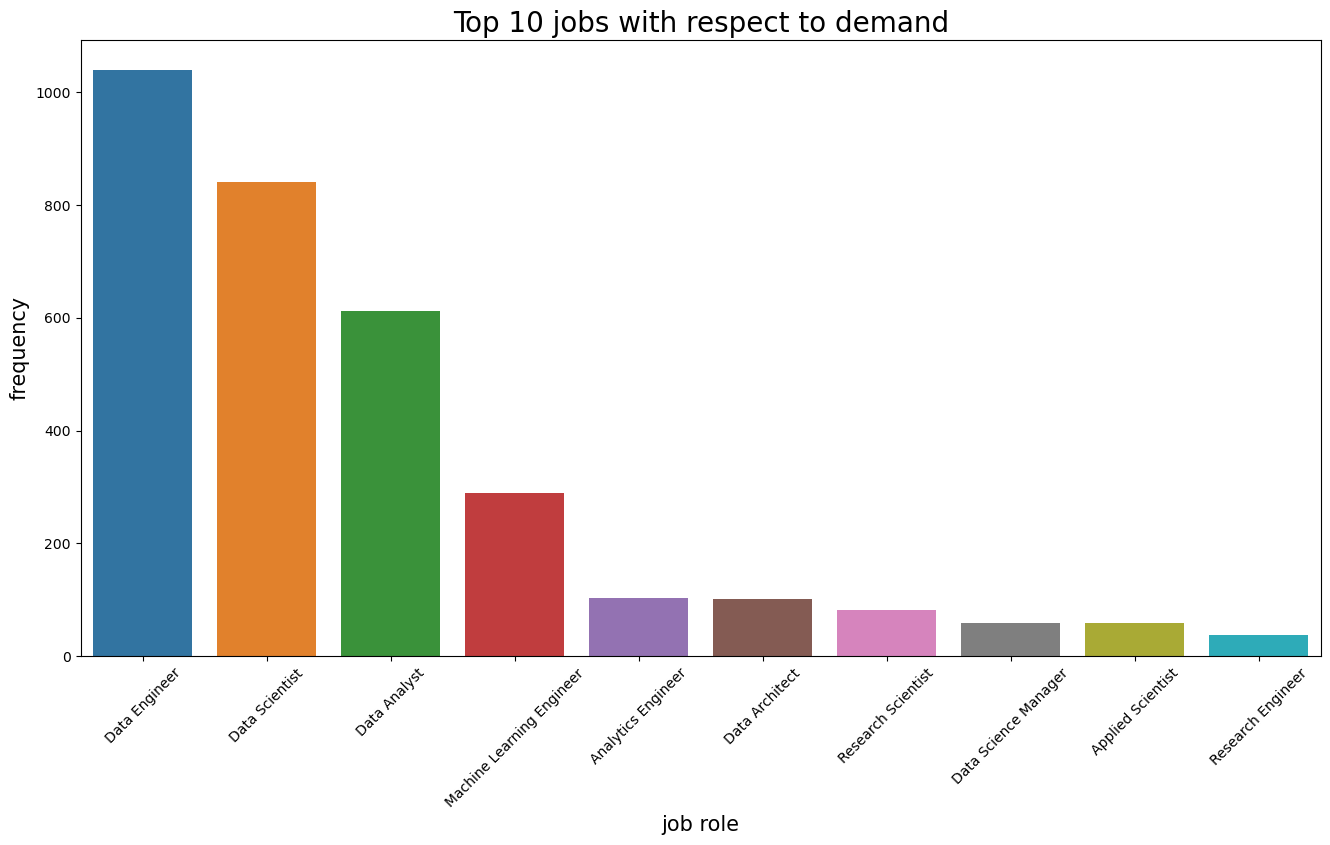

In [10]:
plt.figure(figsize=(16,8))
plt.title("Top 10 jobs with respect to demand",fontsize=20)
sns.barplot(x=job_df["Role"][:10],y=job_df['frequency'][:10])
plt.ylabel("frequency",fontsize=15)
plt.xlabel("job role",fontsize=15)
plt.xticks(rotation=45)
plt.show()

## <b><span style='color:#85BB65'>|</span> Group the job titles</b> 

In [11]:
def assign_broader_category(job_title):
    data_engineering = ["Data Engineer", "Data Analyst", "Analytics Engineer", "BI Data Analyst", "Business Data Analyst", "BI Developer", "BI Analyst", "Business Intelligence Engineer", "BI Data Engineer", "Power BI Developer"]
    data_scientist = ["Data Scientist", "Applied Scientist", "Research Scientist", "3D Computer Vision Researcher", "Deep Learning Researcher", "AI/Computer Vision Engineer"]
    machine_learning = ["Machine Learning Engineer", "ML Engineer", "Lead Machine Learning Engineer", "Principal Machine Learning Engineer"]
    data_architecture = ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"]
    management = ["Data Science Manager", "Director of Data Science", "Head of Data Science", "Data Scientist Lead", "Head of Machine Learning", "Manager Data Management", "Data Analytics Manager"]
    
    if job_title in data_engineering:
        return "Data Engineering"
    elif job_title in data_scientist:
        return "Data Science"
    elif job_title in machine_learning:
        return "Machine Learning"
    elif job_title in data_architecture:
        return "Data Architecture"
    elif job_title in management:
        return "Management"
    else:
        return "Other"

# Apply the function to the 'job_title' column and create a new column 'job_category'
df['job_category'] = df['job_title'].apply(assign_broader_category)

In [12]:
job_category_df = pd.DataFrame(df['job_category'].value_counts().reset_index())
job_category_df.rename(columns = {'index':'category','job_category':'frequency'}, inplace = True)

In [13]:
job_category_df

,category,frequency
0,Data Engineering,1813
1,Data Science,985
2,Other,421
3,Machine Learning,327
4,Data Architecture,105
5,Management,104


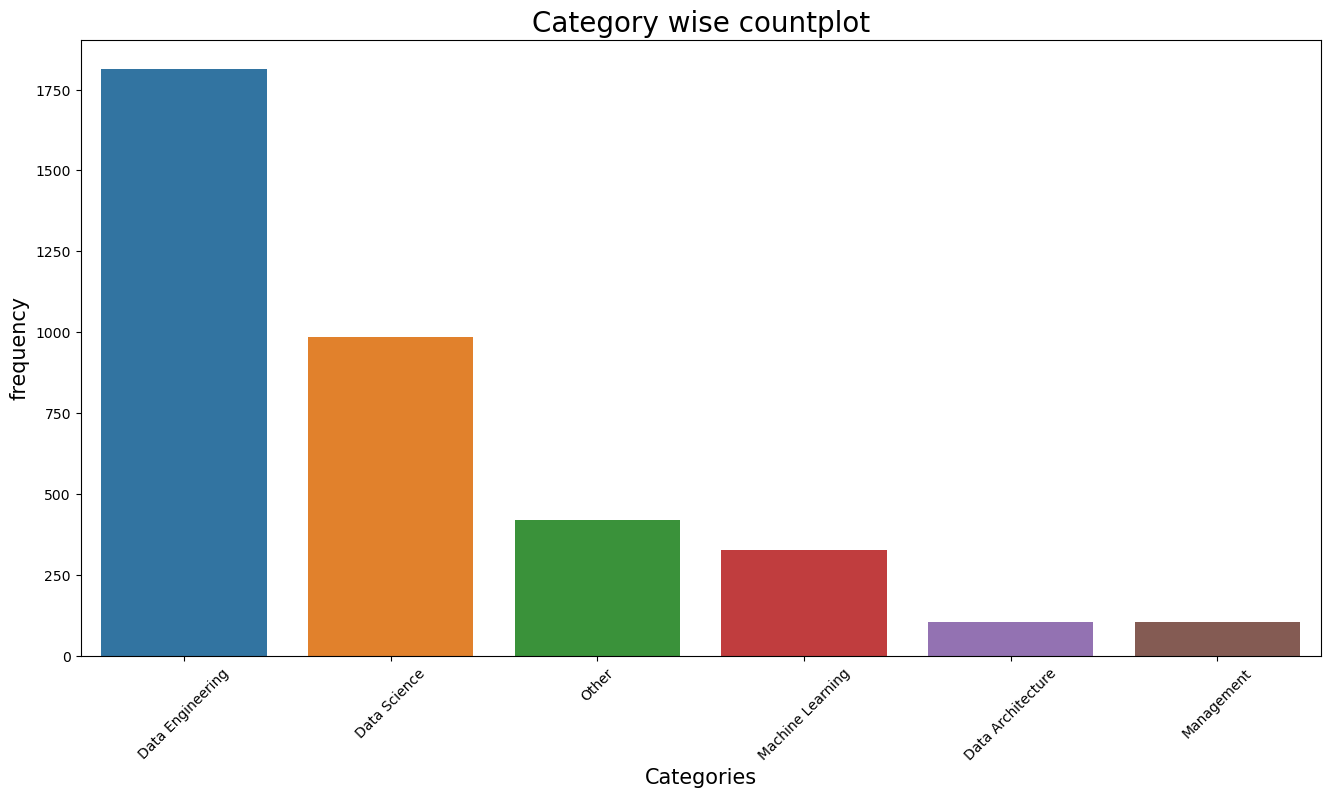

In [14]:
plt.figure(figsize=(16,8))
plt.title("Category wise countplot",fontsize=20)
sns.barplot(x=job_category_df["category"],y=job_category_df['frequency'])
plt.ylabel("frequency",fontsize=15)
plt.xlabel("Categories",fontsize=15)
plt.xticks(rotation=45)
plt.show()

<a id = "1"></a>
# <p style="background-color:#008B8B; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> Univariate Analysis </p>

## <b><span style='color:#85BB65'>|</span> Distribution across different employment types</b> 

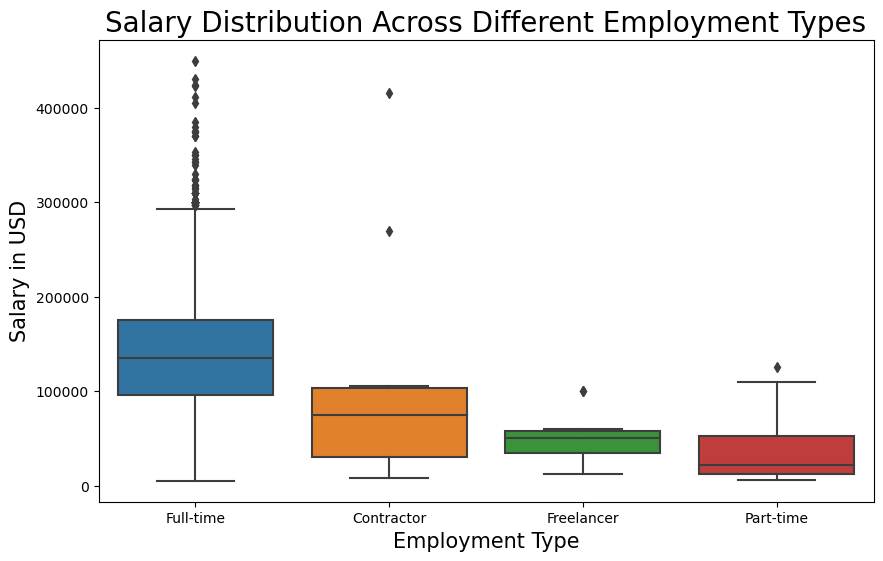

In [15]:
# Salary distribution across different employment types
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='employment_type', y='salary_in_usd')
plt.title('Salary Distribution Across Different Employment Types',fontsize=20)
plt.xlabel('Employment Type',fontsize=15)
plt.ylabel('Salary in USD',fontsize=15)
plt.show()

## <b><span style='color:#85BB65'>|</span> Distribution of Salary</b> 

salary_in_usd: mu = 137570.39, sigma = 63047.23
salary_in_usd: Skewness: 0.54
salary_in_usd: Kurtosis: 0.83


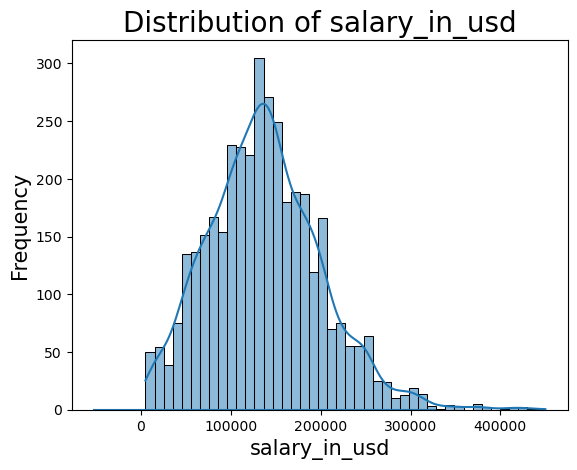

In [16]:
# Create a list of the columns to analyze
columns = ['salary_in_usd']

# Loop over the columns and plot the distribution of each variable
for col in columns:
    # Plot the distribution of the data
    sns.histplot(df[col], kde=True)

    # Fit a normal distribution to the data
    (mu, sigma) = stats.norm.fit(df[col])
    print('{}: mu = {:.2f}, sigma = {:.2f}'.format(col, mu, sigma))

    # Calculate the skewness and kurtosis of the data
    print('{}: Skewness: {:.2f}'.format(col, df[col].skew()))
    print('{}: Kurtosis: {:.2f}'.format(col, df[col].kurt()))

    # Add the fitted normal distribution to the plot
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, y, label='Normal fit')

    # Add labels and title to the plot
    plt.xlabel(col,fontsize=15)
    plt.ylabel('Frequency',fontsize=15)
    plt.title('Distribution of {}'.format(col),fontsize=20)

    plt.show()

## <b><span style='color:#85BB65'>|</span> Boxplot and Swarmplot</b> 

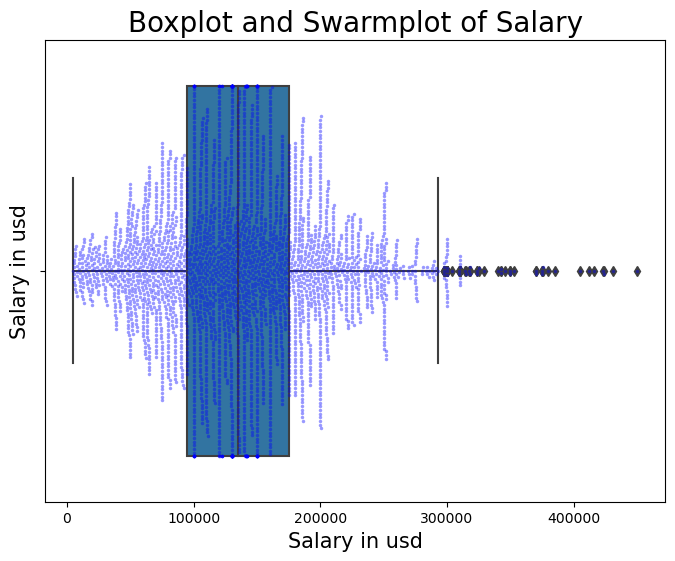

In [17]:
# create boxplot and swarmplot for 'salary_in_usd' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['salary_in_usd'])
sns.swarmplot(x=df['salary_in_usd'], color='blue', alpha=0.4, size=2.5)
plt.ylabel('Salary in usd',fontsize=15)
plt.xlabel('Salary in usd',fontsize=15)
plt.title('Boxplot and Swarmplot of Salary',fontsize=20)
plt.show()

<a id = "1"></a>
# <p style="background-color:#008B8B; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> Bivariate Analysis </p>
## <b><span style='color:#85BB65'>|</span> Median salary by job title</b> 

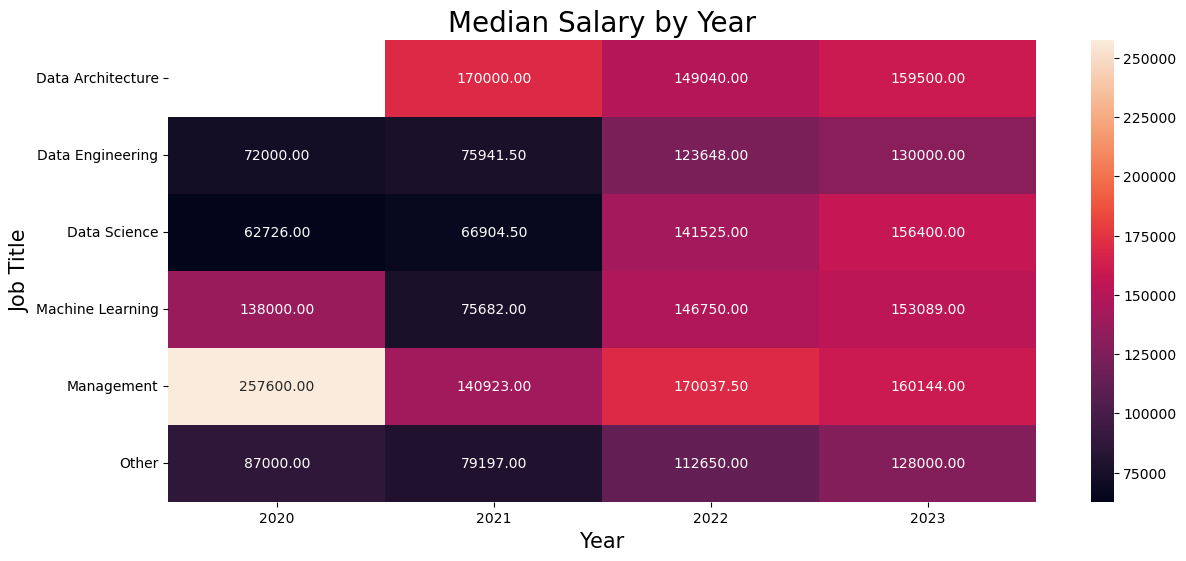

In [18]:
pivot_table = df.pivot_table(values='salary_in_usd', index='job_category', columns='work_year', aggfunc='median')
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="rocket")
plt.title('Median Salary by Year',fontsize=20)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Job Title',fontsize=15)
plt.show()

<a id = "1"></a>
# <p style="background-color:#008B8B; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> Multivariative Analysis </p>
## <b><span style='color:#85BB65'>|</span> Comparision between employee residence and company location</b>

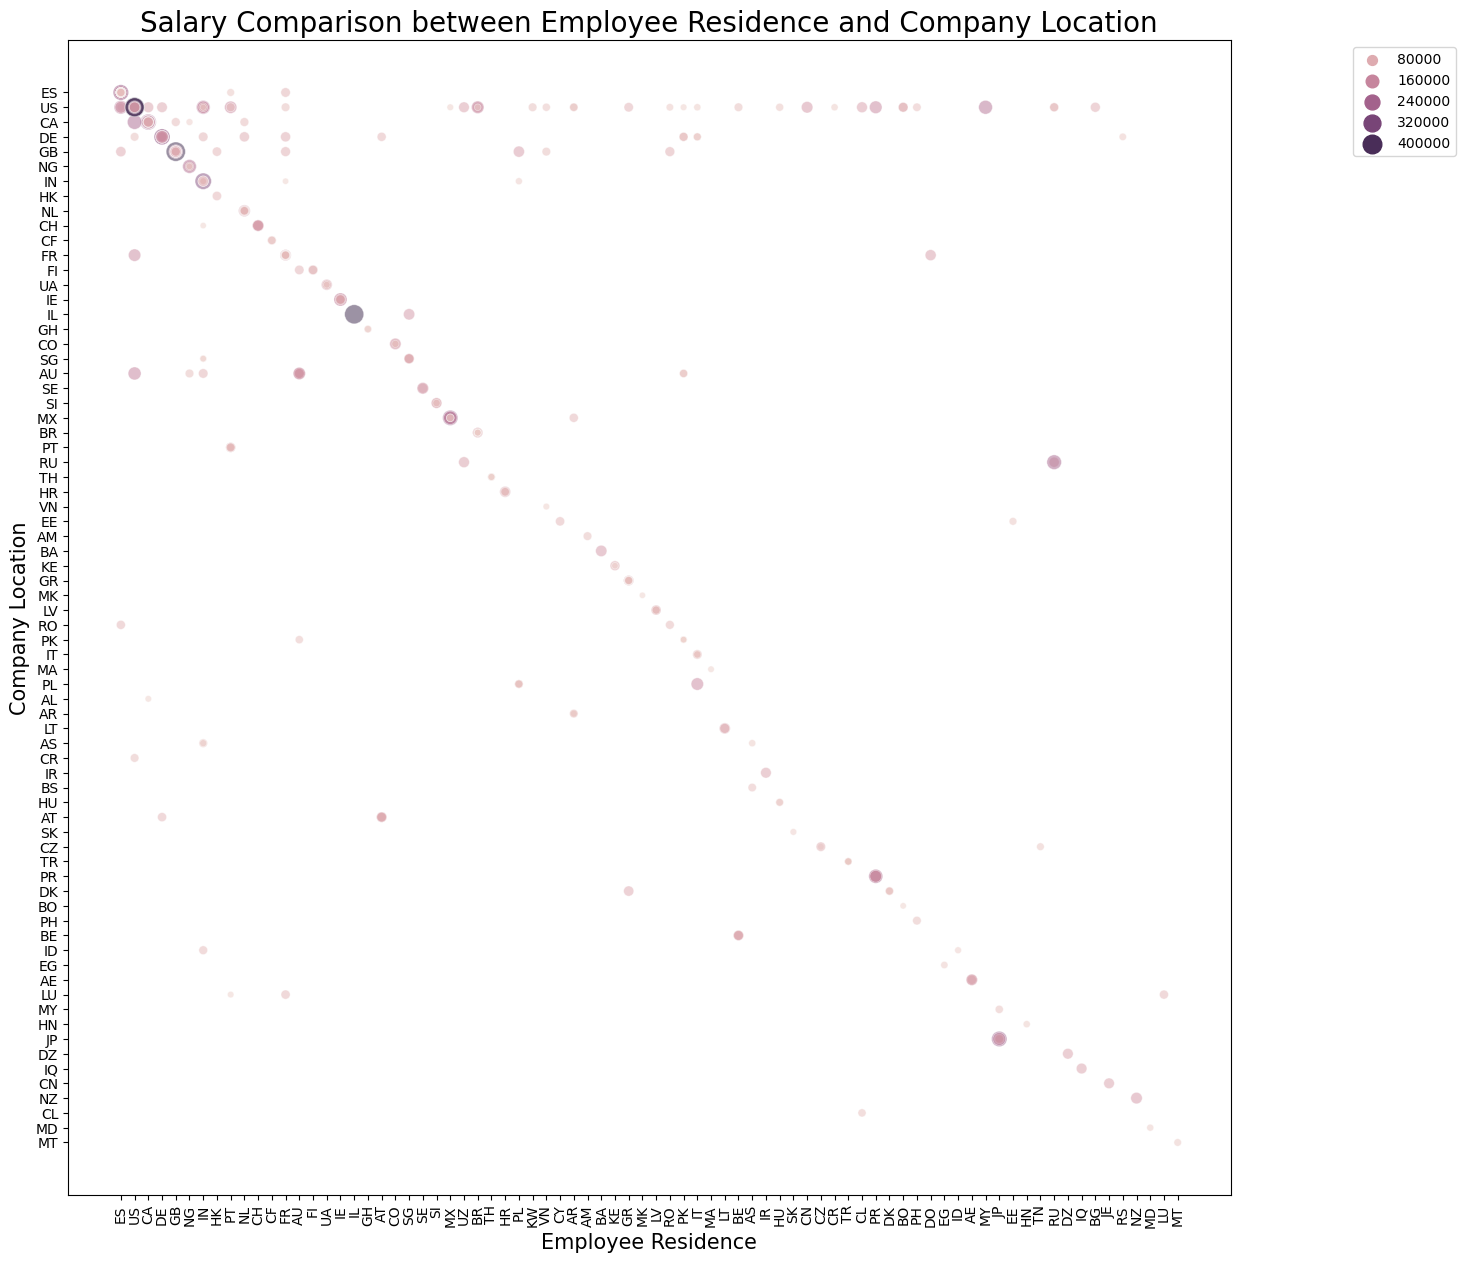

In [19]:
plt.figure(figsize=(15, 15))
sns.scatterplot(data=df, x='employee_residence', y='company_location', hue='salary_in_usd', size='salary_in_usd', sizes=(20, 200), alpha=0.5)
plt.title('Salary Comparison between Employee Residence and Company Location',fontsize=20)
plt.xlabel('Employee Residence',fontsize=15)
plt.ylabel('Company Location',fontsize=15)
plt.xticks(rotation=90)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

## <b><span style='color:#85BB65'>|</span> Comparision of Average Salary by Company location</b>

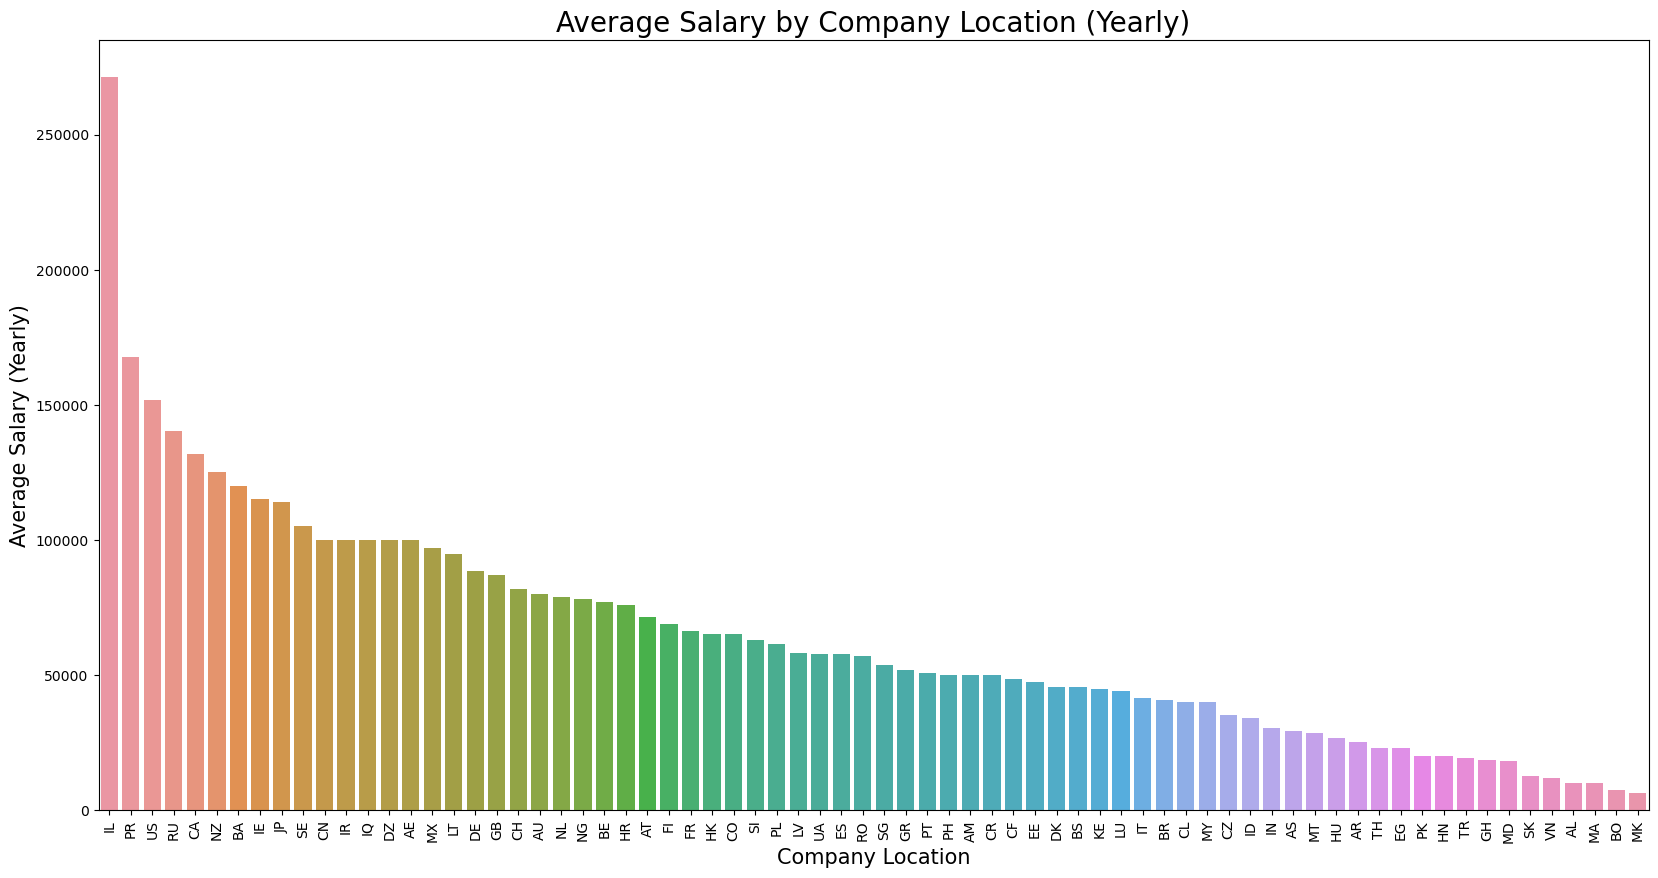

In [20]:
avg_salary_by_location = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)
plt.figure(figsize=(20, 10))
sns.barplot(x=avg_salary_by_location.index, y=avg_salary_by_location)
plt.title('Average Salary by Company Location (Yearly)',fontsize=20)
plt.xlabel('Company Location',fontsize=15)
plt.ylabel('Average Salary (Yearly)',fontsize=15)
plt.xticks(rotation=90)
plt.show()

## <b><span style='color:#85BB65'>|</span> Comparision of Average Salary by Employee residency</b>

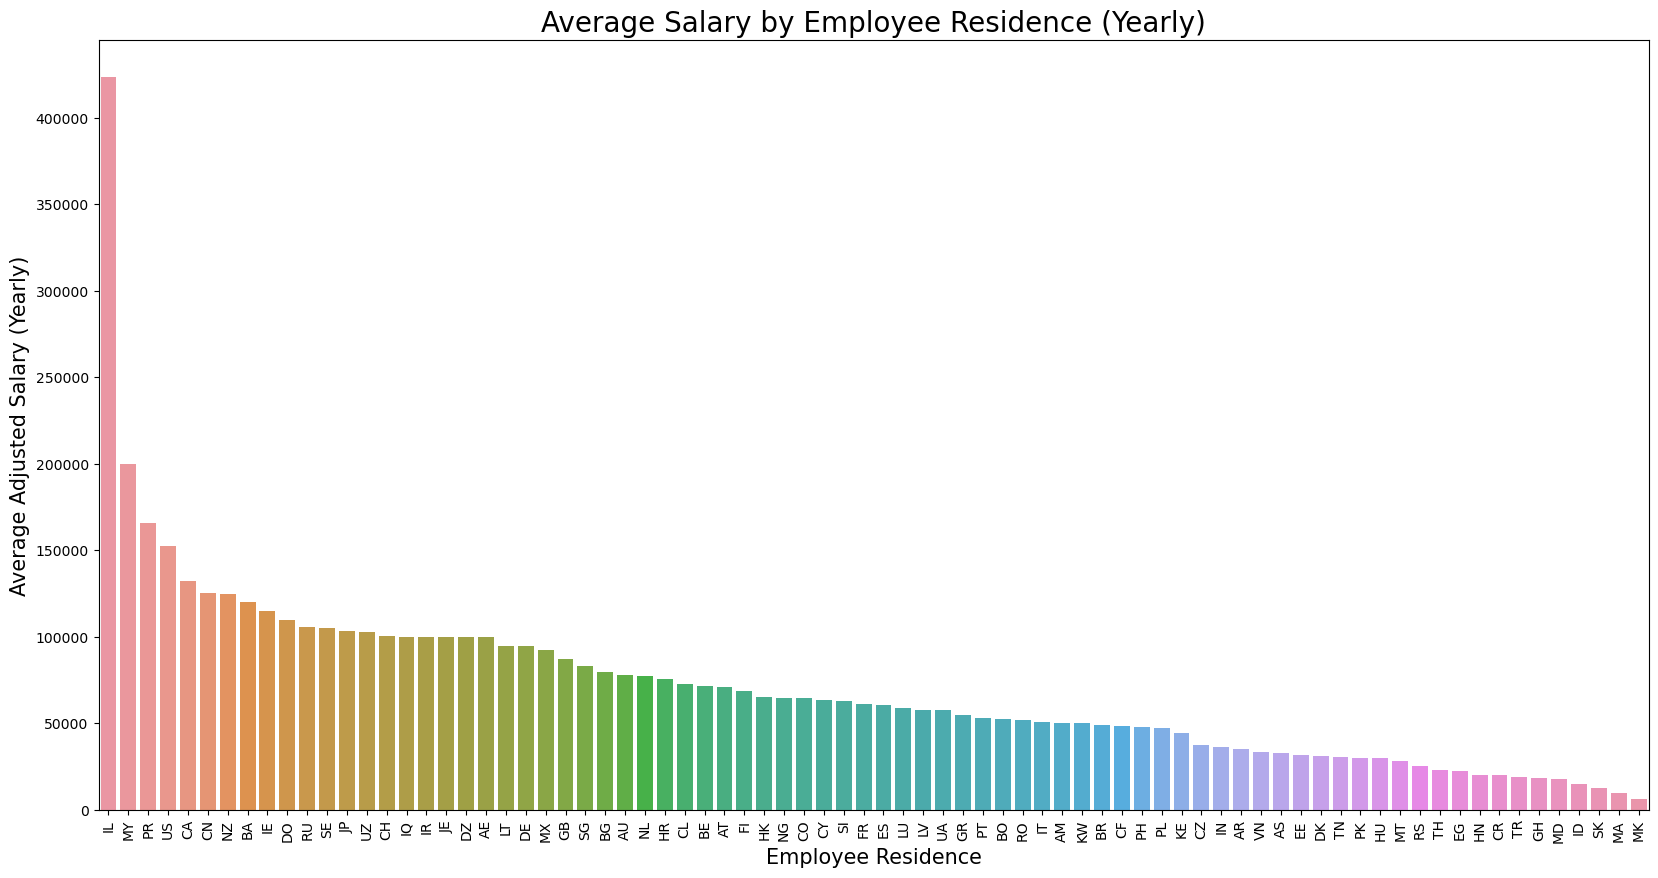

In [21]:
avg_salary_by_residence = df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False)
plt.figure(figsize=(20, 10))
sns.barplot(x=avg_salary_by_residence.index, y=avg_salary_by_residence.values)
plt.title('Average Salary by Employee Residence (Yearly)',fontsize=20)
plt.xlabel('Employee Residence',fontsize=15)
plt.ylabel('Average Adjusted Salary (Yearly)',fontsize=15)
plt.xticks(rotation=90)
plt.show()

<a id = "1"></a>
# <p style="background-color:#008B8B; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> Summary of the data </p>

* The distribution of adjusted salaries reveals that **most data science professionals earn between 74,523 and 200,617 USD per anunum**. However, there are a few high earners that make significantly more than the average.
<li>The range is \( \mu(\vec{x}) \) - \( \sigma(\vec{x}) \) and \( \mu(\vec{x}) \) + \( \sigma(\vec{x}) \) which is 68% of distribution</li>
<li>\( \sigma(\vec{x}) \) is the standard deviation of the feature vector.</li>


* The average salary by company location shows that data scientists working for companies based in countries such as **Israel, USA, and Russia tend to have higher average salaries**. On the other hand, companies located in region like **South East Asia, Africa, and Eastern Europe pay comparatively lower average salaries** to data science professionals.

* The analysis of average salary by employee residence indicates that data scientists residing in countries like **Israel, USA, and Malaysia generally earn higher average salaries**. Conversely, data scientists living in countries like Slovakia, Morocco, and North Macedonia have lower average salaries.

* The salary comparison between employee residence and company location reveals that while some data scientists earn high salaries by working for companies based in countries with high-paying job markets, others may need to relocate or work remotely to benefit from these opportunities.

<a id = "1"></a>
# <p style="background-color:#008B8B; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> Correlation Analysis </p>

In [22]:
categorical_columns = ['experience_level', 'employment_type', 'remote_ratio','company_size','job_category']
numerical_columns = ['salary_in_usd']

### <b><span style='color:#85BB65'>|</span> Create Dummy Variables</b> 

In [23]:
dummy_variables = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

### <b><span style='color:#85BB65'>|</span> Preprocessing and Scaling the data: Standard Scaler</b>

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale the numerical columns
scaled_numerical = scaler.fit_transform(df[numerical_columns])

# Convert the scaled numerical columns
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

In [25]:
# Drop the original numerical columns
dummy_variables = dummy_variables.drop(numerical_columns, axis=1)

# Concatenate the dummy variables and scaled numerical columns
processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)
processed_df = processed_df.drop(['work_year', 'salary'], axis=1)

### <b><span style='color:#85BB65'>|</span> Corelation Matrix with dummy variables</b> 

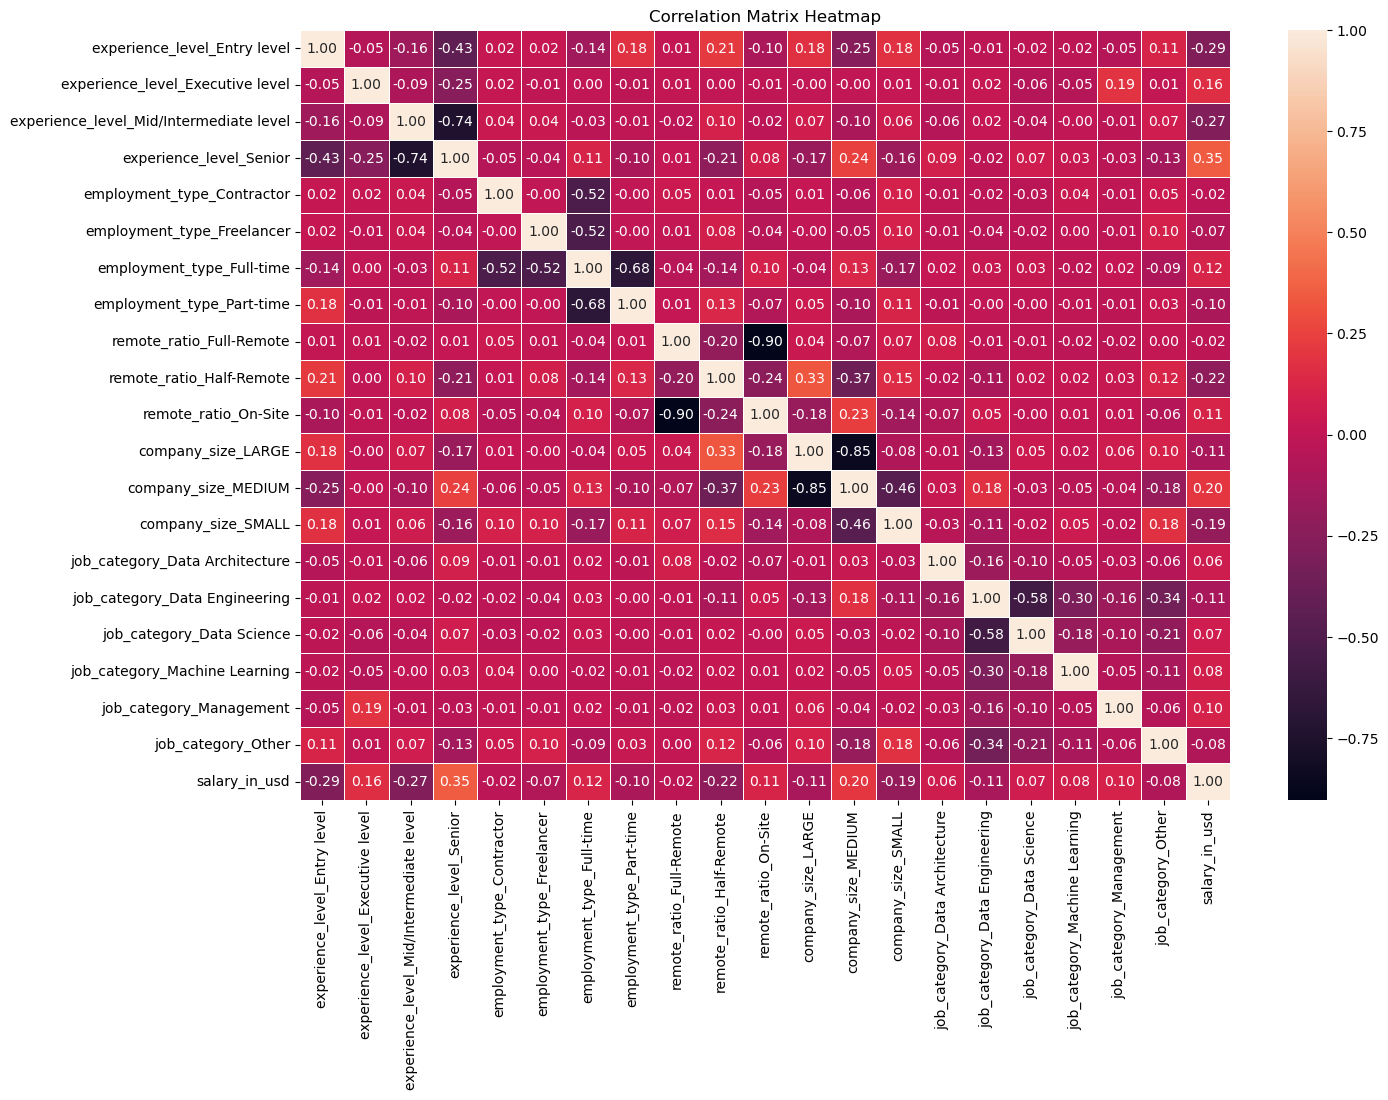

In [26]:
correlation_matrix = processed_df.corr()

#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

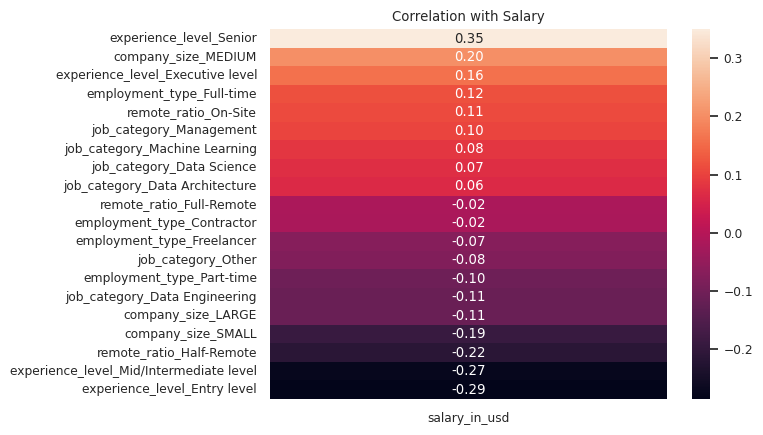

In [27]:
corr = processed_df.corr()
target_corr = corr['salary_in_usd'].drop('salary_in_usd')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="rocket", annot=True, fmt='.2f')
plt.title('Correlation with Salary')
plt.show()

In [28]:
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

<a id = "1"></a>
# <p style="background-color:#008B8B; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> Predictive Analysis </p>

In [29]:
!pip install pycountry

In [30]:
# Import pycountry package
import pycountry

# define function to find country name
def do_search(country_code):
    try:
        result = pycountry.countries.get(alpha_2=country_code)
    except Exception:
        return np.nan
    else:
        return result.name

# Given ISO Alpha 2 column return country name
df["country"] = df["company_location"].apply(lambda country_code: do_search(country_code))
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category,country
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,ES,Full-Remote,ES,LARGE,Other,Spain
1,2023,Mid/Intermediate level,Contractor,ML Engineer,30000,USD,30000,US,Full-Remote,US,SMALL,Machine Learning,United States
2,2023,Mid/Intermediate level,Contractor,ML Engineer,25500,USD,25500,US,Full-Remote,US,SMALL,Machine Learning,United States
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,CA,Full-Remote,CA,MEDIUM,Data Science,Canada
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,CA,Full-Remote,CA,MEDIUM,Data Science,Canada


<Axes: xlabel='count', ylabel='country'>

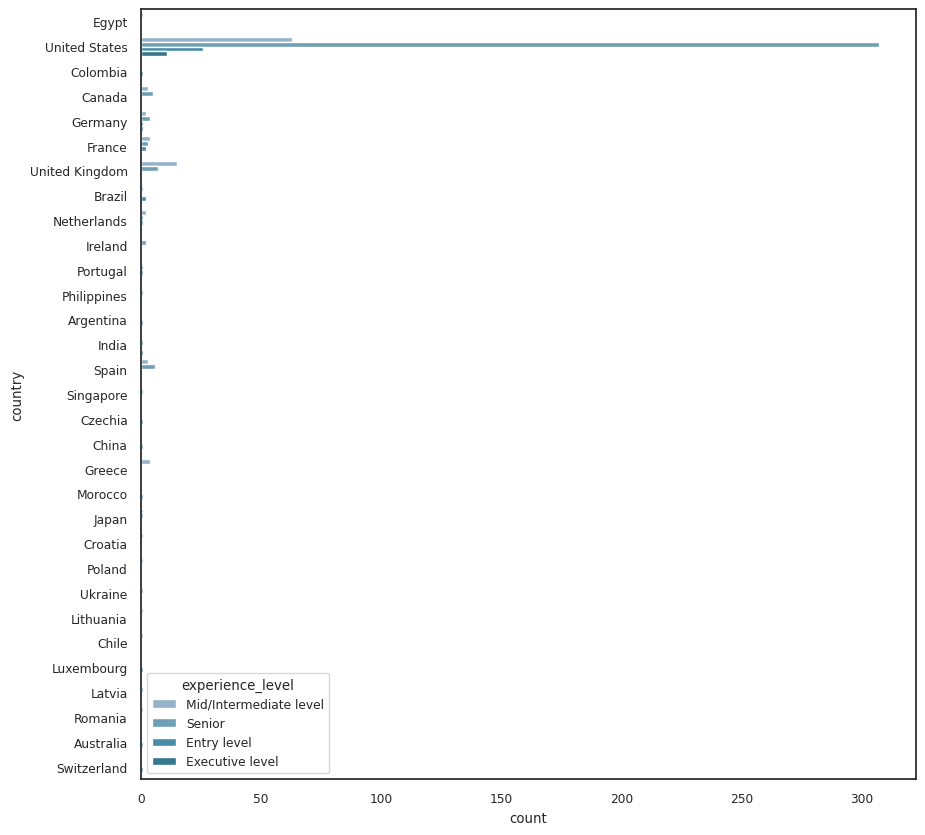

In [31]:
plt.figure(figsize=(10,10))
sns.countplot(data=df.sample(500), y="country", hue="experience_level")

<Axes: xlabel='experience_level', ylabel='count'>

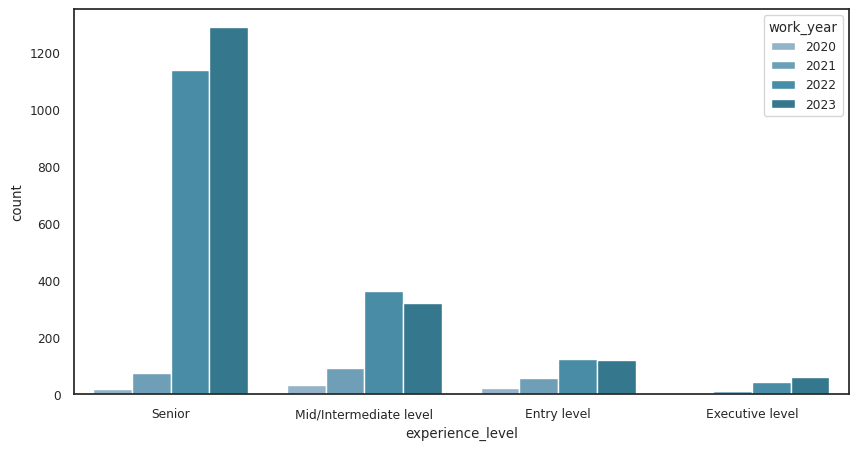

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="experience_level", hue="work_year")

### <b><span style='color:#85BB65'>|</span> Train the model using TensorFlow</b> 

In [33]:
df_tf = pd.read_csv("/kaggle/input/data-science-salaries-2023/ds_salaries.csv")

In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Transform data using LabelEncoder
cols = ['experience_level', 'employment_type', 'job_title','salary_currency','employee_residence','company_location','company_size']
df_tf[cols]=df_tf[cols].apply(LabelEncoder().fit_transform)

# Create X, y
X = df_tf.drop(["salary_in_usd"], axis=1)
y = df_tf["salary_in_usd"]

# Build train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### <b><span style='color:#85BB65'>|</span> Create, compile, and train the model</b> 

In [35]:
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1),
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Fit the model
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 133048.2812 - mae: 133048.2812
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 83138.7031 - mae: 83138.7031
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 57219.4297 - mae: 57219.4297
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 57028.1562 - mae: 57028.1562
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 57290.0781 - mae: 57290.0781
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 56527.0898 - mae: 56527.0898
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 56469.0586 - mae: 56469.0586
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 56349.7734 - mae: 56349.7734
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 56616.8359 - mae: 56616.8359
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 56620.

<Axes: >

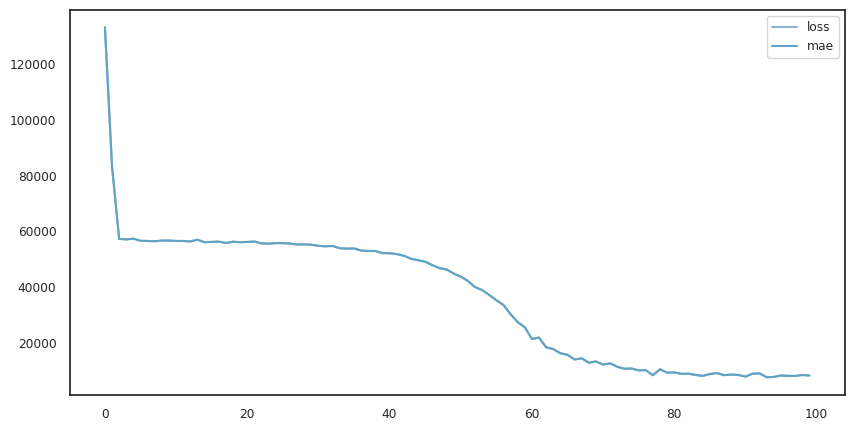

In [36]:
# Plot loss curves
pd.DataFrame(history.history).plot(figsize=(10,5))

In [37]:
prediction = model.predict(X_test)

24/24 [==============================] - 0s 2ms/step


In [38]:
prediction = np.ravel(prediction)

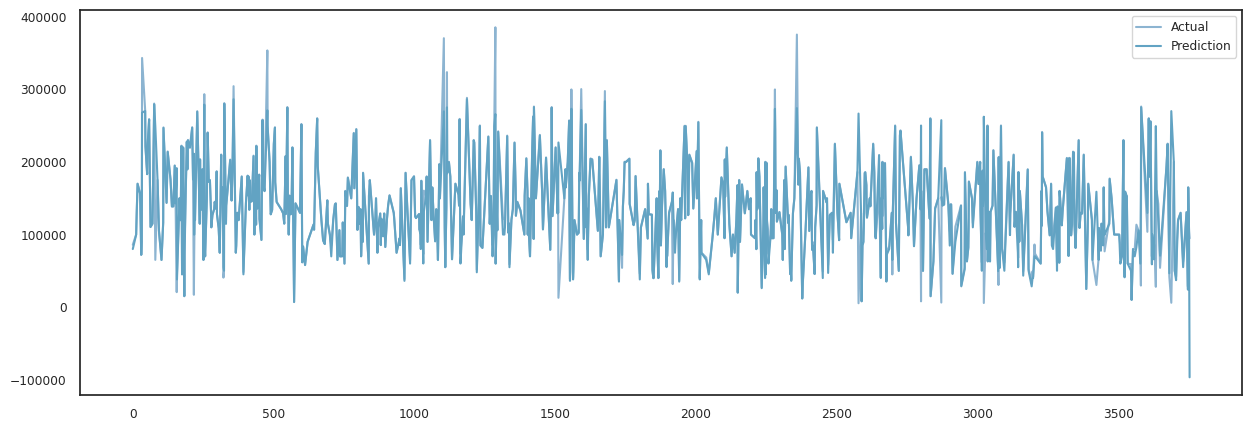

In [39]:
# Prepare data for plot
df_final = pd.DataFrame({"Y_test": y_test , "Prediction" : prediction})

# Sort index before plot
df_final = df_final.sort_index()

# Plot the final result
plt.figure(figsize= (15,5))
plt.plot(df_final)
plt.legend(["Actual" , "Prediction"])

***

<br>

<br>

<div style="text-align: center;">
   <span style="font-size: 1.4em; font-weight: bold; font-family: Arial; max-width:1200px; display: inline-block;">
Hope you find the notebook relevant and informational :)
   </span>
</div>

This notebook is inspired by: https://www.kaggle.com/code/tumpanjawat/ds-salary-full-eda-geo-cluster-xgboost
<br>
Huge thanks to: https://www.kaggle.com/tumpanjawat and https://www.kaggle.com/maicmi